In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from subprocess import call
from IC.importer import *
from IC.processer import *
from IC.main import sim_events
from DC.event_processing import list_of_params_nsi
from functions import nufit_params_nsi
from src.plotter import P_over_E_parameter, nsi_oscillogram, nsi_flux_oscillogram, save, savethesis
from scipy.stats import chi2
import pickle
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 400
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)

In [2]:
IC_range = np.logspace(np.log10(500),4,50)
DC_range = np.logspace(np.log10(5.6),np.log10(56),50)
all_range = np.logspace(np.log10(2),5.1,100)

params = nufit_params_nsi.copy()

ett_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [-7e-2,0],[0],[0],[0])
emt_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[-5e-2,0],[0],[0])
eem_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[0],[-3e-1,0],[0])
eet_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[0],[0],[-3e-1,0])
zenith = -1

In [32]:
Pe_ett_anti = P_over_E_parameter('e',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pe_ett = P_over_E_parameter('e',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pe_emt_anti = P_over_E_parameter('e',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pe_emt = P_over_E_parameter('e',emt_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pe_eem_anti = P_over_E_parameter('e',eem_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pe_eem = P_over_E_parameter('e',eem_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pe_eet_anti = P_over_E_parameter('e',eet_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pe_eet = P_over_E_parameter('e',eet_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pm_ett_anti = P_over_E_parameter('m',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pm_ett = P_over_E_parameter('m',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pm_emt_anti = P_over_E_parameter('m',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pm_emt = P_over_E_parameter('m',emt_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pm_eem_anti = P_over_E_parameter('m',eem_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pm_eem = P_over_E_parameter('m',eem_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pm_eet_anti = P_over_E_parameter('m',eet_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pm_eet = P_over_E_parameter('m',eet_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pt_ett_anti = P_over_E_parameter('t',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pt_ett = P_over_E_parameter('t',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pt_emt_anti = P_over_E_parameter('t',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pt_emt = P_over_E_parameter('t',emt_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pt_eet_anti = P_over_E_parameter('t',eet_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pt_eet = P_over_E_parameter('t',eet_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

Pt_eem_anti = P_over_E_parameter('t',eem_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith).reshape(len(ett_params),3,-1)
Pt_eem = P_over_E_parameter('t',eem_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith).reshape(len(ett_params),3,-1)

In [33]:
P = np.array([Pe_ett,Pe_emt,Pe_eem, Pe_eet, Pm_ett,Pm_emt, Pm_eem,Pm_eet, Pt_ett, Pt_emt,Pt_eem, Pt_eet]).reshape(3,4,2,3,len(all_range))
P_anti = np.array([Pe_ett_anti,Pe_emt_anti,Pe_eem_anti, Pe_eet_anti, Pm_ett_anti,Pm_emt_anti, Pm_eem_anti,Pm_eet_anti, Pt_ett_anti, Pt_emt_anti,Pt_eem_anti, Pt_eet_anti]).reshape(3,4,2,3,len(all_range))

In [ ]:
'''
In the $\mu\tau$ sector, we have a resonance in the \SI{20}{\GeV} area. Any NSI parameter involving $\mu$ or $\tau$ will dampen this resonance,
with some also shifting the probability in the stationary region above \SI{100}{\GeV}.
The `double effect' of both dampening and shifting happens in two cases: either when we have a high probability with one shared channel (i.e. Pmm and \eem), or when the sectors align (i.e. \emt for Pmt). The only exception to this rule is for Ptt, which due to its near-maximal mixing with the 
$\mu$ channel displays dampening for \eem even tough they share no channel. 



Due to the lightness of $\Delta m^2_{21}$, the $e$ channel has no resonance in the GeV range. Thus, the only impact that 
the NSI parameters considered here can have on any $\nu_e$ probability is shifting, and this only occurs when the requirements for the `double effect'
are met. So except for P_{ee} where the probability is high, any NSI parameter whose sector does not match the probability sector will not drastically affect P. 

Thus, the only off-diagonal NSI parameters that strongly affect the transition probabilities $P_{\alpha\beta}$ are $\epsilon{\gamma\beta}$,
while the survival probabilities $P_{\alpha\alpha}$ are only strongly affected by  $\epsilon_{\alpha\beta}$. Any probabilities $P_{e\beta}$ will
only see a shift in the stationary region, while the two other channels undergo either resonance dampening, or the `double effect'.

'''

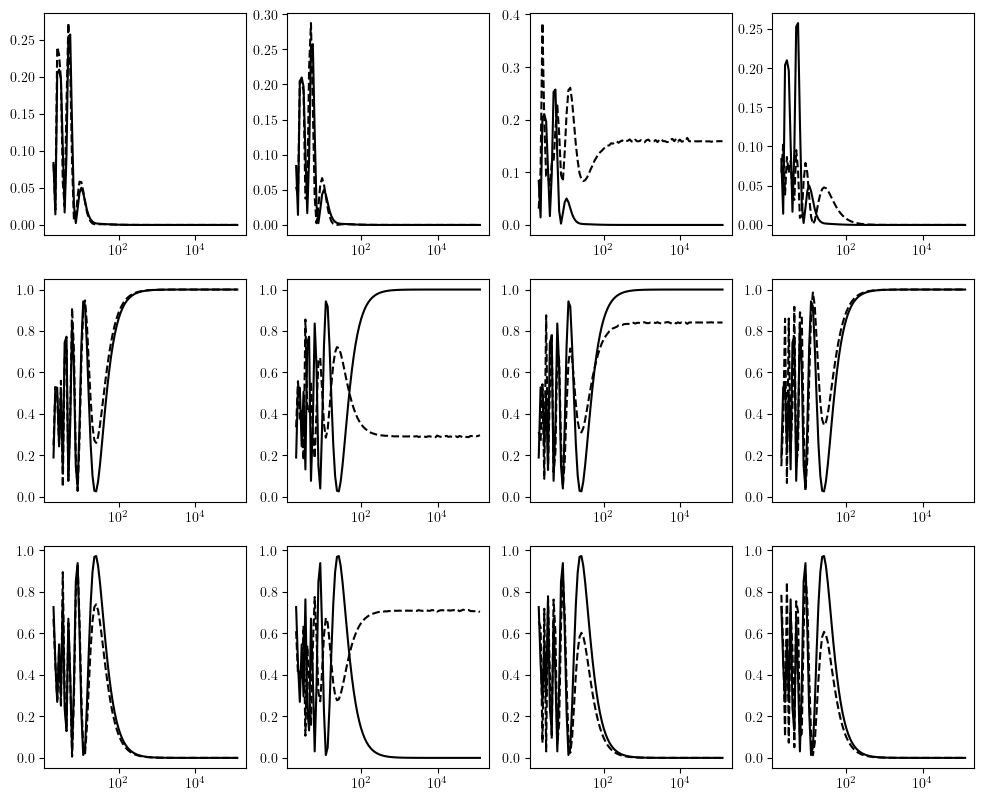

In [70]:
fig, ax = plt.subplots(3,4, figsize=(12,10))
i_from = 1
for i_to in range(3):
    for nsi_param in range(4):
        ax[i_to, nsi_param].plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid')
        ax[i_to, nsi_param].plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed')
        ax[i_to, nsi_param].set_xscale('log')

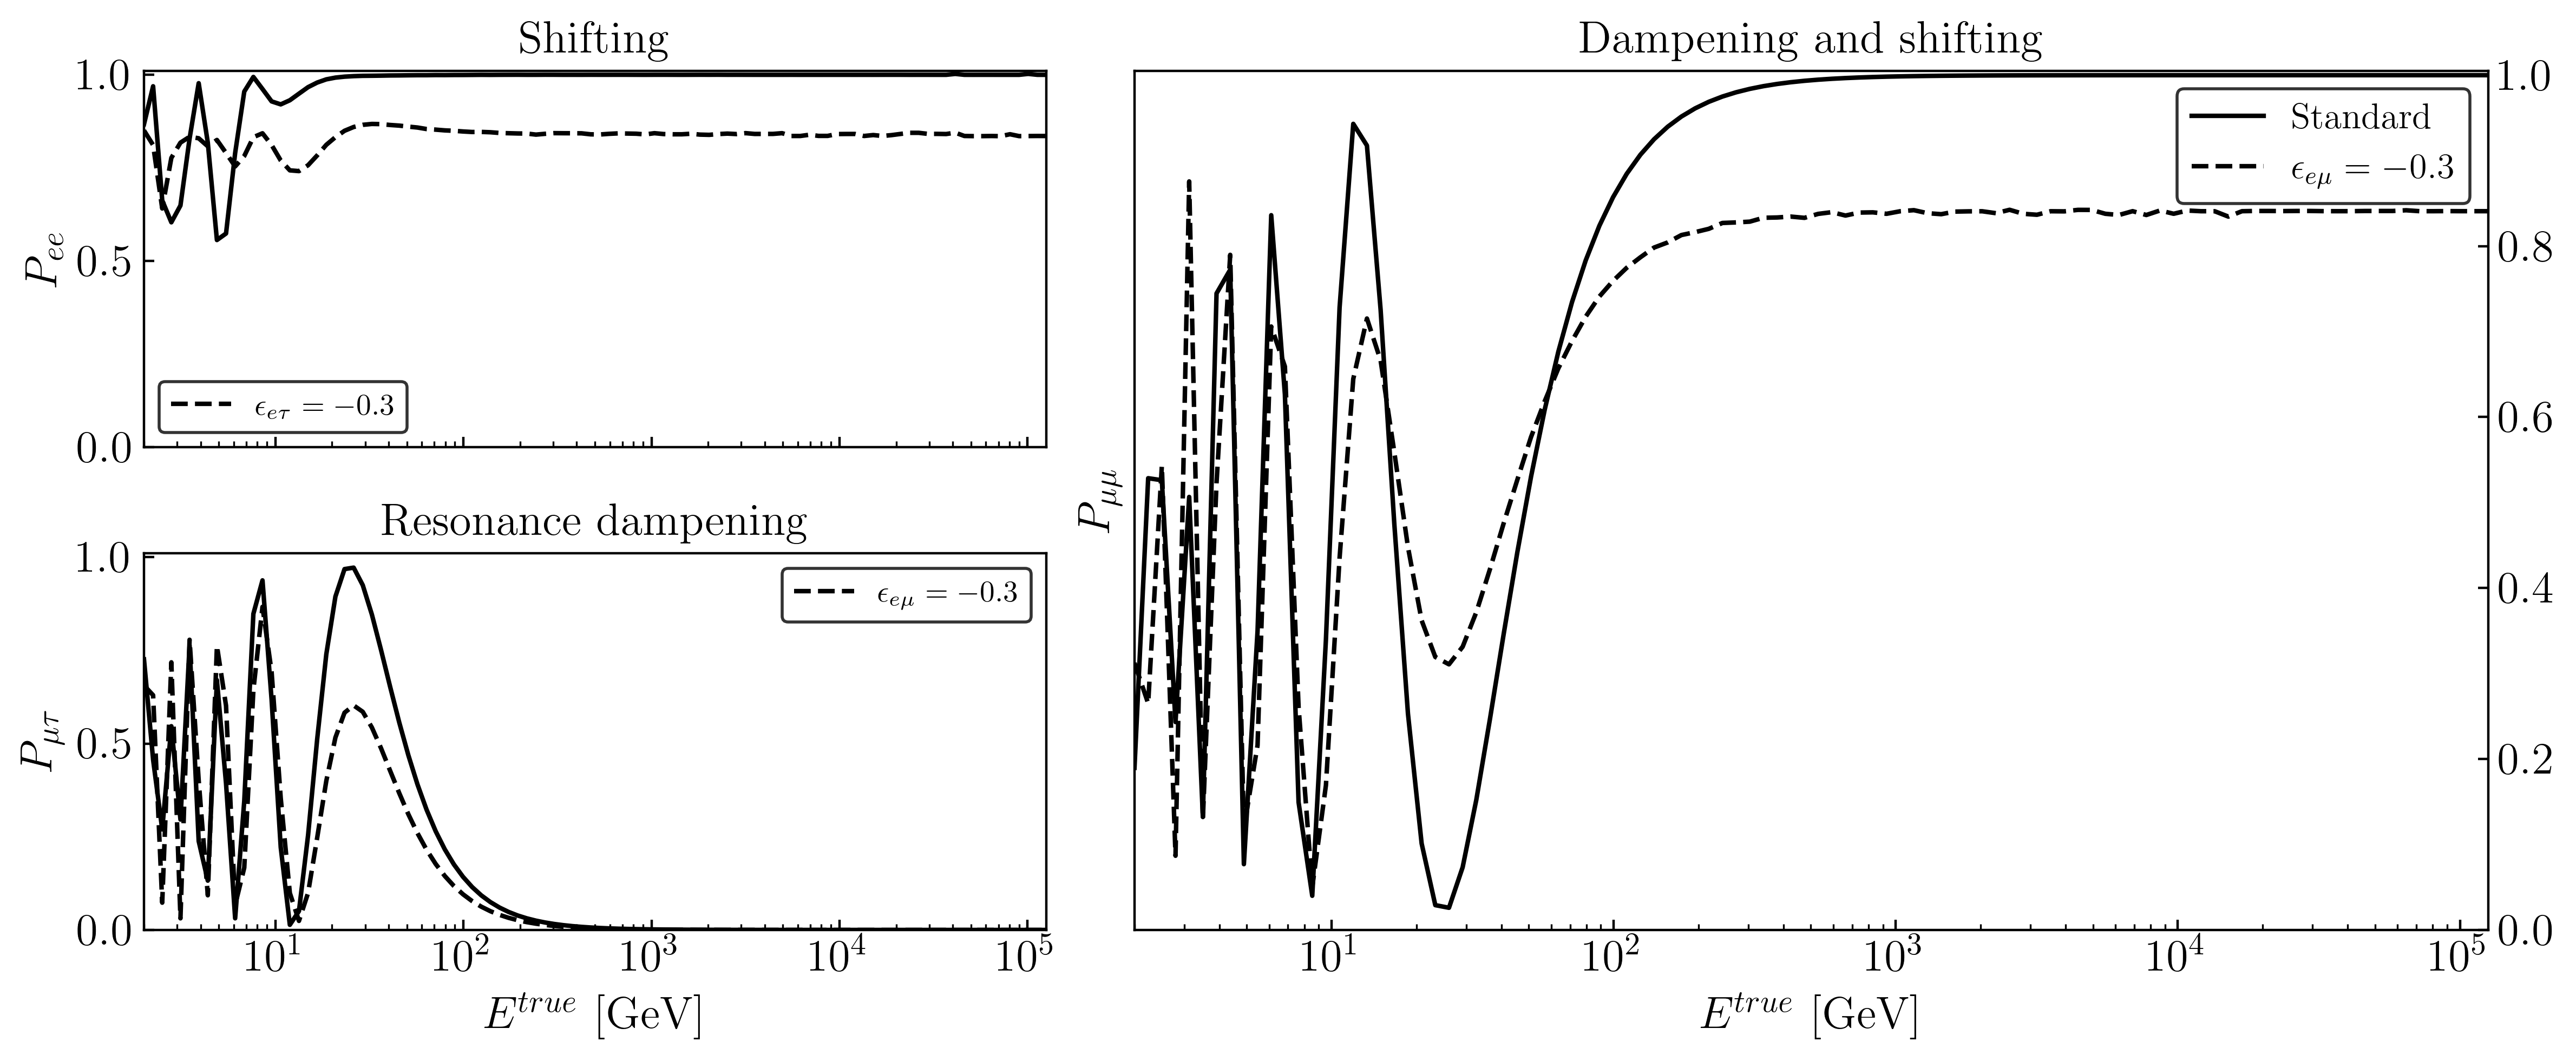

In [75]:
# Setting up the plot surface
plt.rcParams['figure.dpi'] = 400
from matplotlib import gridspec
i_from = 0
i_to = 0
nsi_param = 3
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1, 1.5], height_ratios=[1, 1])
# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed', label=r'$\epsilon_{e\tau} = -0.3$')
ax0.plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid')
ax0.set_xscale('log')
ax0.set_ylabel(r'$P_{ee}$', fontsize=15)
ax0.set_xticklabels([])
#ax0.set_ylabel(r'$\nu_{\mu}$ survival', fontsize=15)
ax0.set_title(r'Shifting', fontsize=15)
ax0.set_ylim(0,1.01)
ax0.set_xlim(all_range.min(),all_range.max())
ax0.tick_params(axis='both', direction='in', which='both')
ax0.tick_params(labelsize=15)
# Second axes
ax1 = fig.add_subplot(gs[1, 0])
i_from = 1
i_to = 2
nsi_param = 2
ax1.plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed', label=r'$\epsilon_{e\mu} = -0.3$')
ax1.plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid')
ax1.set_xscale('log')
ax1.set_ylabel(r'$P_{\mu\tau}$', fontsize=15)
ax1.set_title(r'Resonance dampening', fontsize=15)
ax1.set_xlabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=15)
ax1.set_ylim(0,1.01)
ax1.set_xlim(all_range.min(),all_range.max())
ax1.tick_params(axis='both', direction='in', which='both')
ax1.tick_params(labelsize=15)
# Third axes
ax2 = fig.add_subplot(gs[:, 1])
i_from = 1
i_to = 1
nsi_param = 2
ax2.plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid', label='Standard')
ax2.plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed', label=r'$\epsilon_{e\mu} = -0.3$')
ax2.set_xscale('log')
ax2.set_title(r'Dampening and shifting', fontsize=15)
ax2.set_xlabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=15)
ax2.set_ylim(0,1.005)
ax2.set_xlim(all_range.min(),all_range.max())

ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('right')
ax2.set_ylabel(r'$P_{\mu\mu}$', fontsize=15)
ax2.tick_params(axis='both', direction='in', which='both')
ax2.tick_params(labelsize=15)


leg= ax2.legend(fontsize=12)
leg.get_frame().set_edgecolor('k')

leg= ax1.legend(fontsize=10)
leg.get_frame().set_edgecolor('k')

leg= ax0.legend(fontsize=10)
leg.get_frame().set_edgecolor('k')

plt.tight_layout()
save(fig, 'nsi_probs')

In [ ]:

'''
One at a time:
    DC:
        e_mm:
            Positive makes resonance somewhat shallower
            No other effects
        e_mt:
            Positive e_mt drastically compresses the curve to the left
            Negative e_mt drastically stretches the curve to the right
    IC:
        e_mm:
            Positive barely compresses the resonance up
            Negative barely stretches the resonance down
        e_mt:
            Positive has no effect in low-E
            Negative banks the curve down, similar to theta_24
            Both barely makes resonance deeper. 
            Both shifts P down in high-E
Both:
    DC: 
        e_mm:
            Positive makes the resonance somewhat shallower
            Negativte deepens the resonance somewhat
        e_mt:
            Positive drastically compresses whole curve to the left
            Negative drastically streches whole curve to the right
        
        
    IC:
        e_mm:
            Positive has no effect here.
            Negative somewhat deepens the resonance
        e_mt:
            Positive has no effect in low-E
            Negative banks the low-E curve down, similar to theta_24
            
        All values of e_mm and e_mt shifts P down at high-E
Conclusion:
    e_mm and e_mt seem independent, since they affect P in the same way irrespective of the others value. I.e. strechting of DC P by e_mt happens irrespective of e_mm.
    DC:
        e_mt has a drastic stretching. 
        e_mm barely deepens the resonance dip 
    IC:
        Almost neglible effect at resonance.
        Negative e_mt pulls P down at low-E
        All e pulls P down at high-E
    For Pmm, the behavior is the same when we flip signs on e. Pmm has no resonance of course, but behavior in low-E and high-E is intact.
    Looking at the contour plots, we see that e' and e_mt are independent for low values (<1e-2), and this is what i see in the P plots as well. 
'''

In [4]:
z_range = np.linspace(-1,0,20)
IC_range = np.logspace(np.log10(500),4,10)

#P_emm_IC= [nsi_oscillogram(all_range, z_range, p) for p in emm_params]
#P_emt_IC= [nsi_oscillogram(all_range, z_range, p) for p in emt_params]

#P_emm_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emm_params]
#P_emt_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emt_params]

Text(0.5, 0.98, '$\\bar{\\nu}_\\mu$ disappearance, DC')

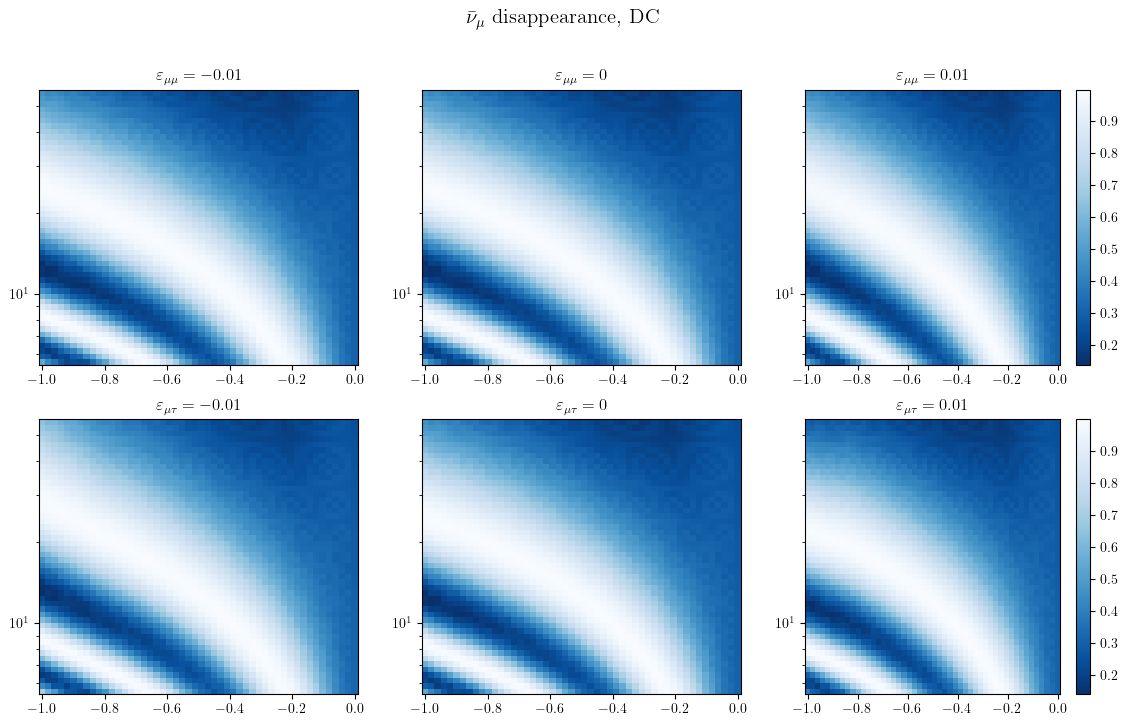

In [51]:
fig, ax = plt.subplots(2,3, figsize=(3.5*4,8))
ax = ax.flatten()
for i in range(3):  
    ax[i].set_title(rf'$\varepsilon_{{\mu\mu}} = {emm_params[i]["e_mm"]}$')
    c=ax[i].pcolormesh(z_range, DC_range,P_emm_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i].set_yscale('log')

    ax[i+3].set_title(rf'$\varepsilon_{{\mu\tau}} = {emt_params[i]["e_mt"]}$')
    c=ax[i+3].pcolormesh(z_range, DC_range,P_emt_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i+3].set_yscale('log')

    if i == 2:
        fig.colorbar(c, ax=ax[i])
        fig.colorbar(c, ax=ax[i+3])
fig.suptitle(r'$\bar{\nu}_\mu$ disappearance, DC', fontsize=15)

In [3]:
filename = '../NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df.query('Ereco == Ereco.min()')['Etrue'].quantile(0.1)
Ebins = 500*10**np.linspace(0,1.3,14)
df['Ebin'] = pd.cut(df.Ereco,Ebins,labels=False)
#df = df.groupby('Ebin').
#df.query('Ebin == 0.0').Etrue.quantile(0.1)
from IC.processer import get_Etrue, get_interpolators
_,_,model = get_interpolators()
get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]

(array([ 284.276,  745.293, 1953.95 ]),
 array([6.569, 6.604, 6.663]),
 array([0.357, 0.356, 0.355]))

In [16]:
get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]

284.276466762975

In [18]:
get_Etrue(model, 3,0.995,0.995,E_index=12)[0][2]

103821.37459903302

In [4]:
get_Etrue(model, 3,0.99,0.99,E_index=0)

(array([ 310.745,  745.443, 1788.238]),
 array([6.569, 6.604, 6.663]),
 array([0.357, 0.356, 0.355]))

In [4]:
filename = '../NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df.sample(10).to_latex('t.tex')

In [10]:
from DC.importer import MC2018_DC
#MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.01)
MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(0.005)

13.164715576171876

In [3]:
z_range = np.linspace(-1,0,10)
IC_range = np.logspace(np.log10(500),4,5)
all_range = np.logspace(np.log10(1),5.1,10)
flux_emt_IC_track= np.array(nsi_flux_oscillogram(all_range, z_range, emt_params[0]))
#flux_emt_IC_cascade= np.array(nsi_flux_oscillogram(all_range, z_range, emt_params[0]))
#flux_emt_IC_track = pickle.load(open('./pre_computed/P_emt_IC_track.p','rb'))
#flux_emt_IC_cascade = pickle.load(open('./pre_computed/P_emt_IC_cascade.p','rb'))

In [11]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)

1.9329288434982304

In [14]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)

1.9329288434982304

In [15]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)

210.22446929931684

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-0.6, vmax=1.6)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [10]:
track_cmap_dict = {'red':  ((0.0, 0.0, 0),
                   (0.32, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.0, 0.3),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.1, 0.1),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 0.6),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.1, 0.1),
                    (1.0, 0.0, 0.0))
          }

In [6]:
from matplotlib.colors import CenteredNorm
from matplotlib.colors import LinearSegmentedColormap
cascade_cmap_dict = {'red':  ((0.0, 0.0, 0),
                   (0.25, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.1, 0.2),
                    (0.25, 1.0, 1.0),
                    (0.75, 0.2, 0.2),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.1, 0.5),
                    (0.25, 1.0, 1.0),
                    (0.75, 0.0, 0.0),
                    (1.0, 0.0, 0.0))
          }
track_cmap_dict = {'red':  ((0.0, 0.0, 0),
                   (0.32, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.1, 0.2),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.2, 0.2),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.1, 0.5),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.0, 0.0),
                    (1.0, 0.0, 0.0))
          }
track_cmap = LinearSegmentedColormap('BlueRed1', track_cmap_dict)
cascade_cmap = LinearSegmentedColormap('BlueRed1', cascade_cmap_dict)
plot_examples([viridis, track_cmap])

NameError: name 'plot_examples' is not defined

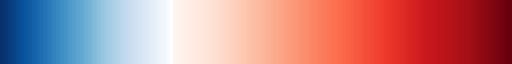

In [12]:
bottom = cm.get_cmap('Blues_r', 64)
top = cm.get_cmap('Reds', 128)

newcolors = np.vstack((bottom(np.linspace(0, 1, 64)),
                        (1,1,1,1),
                       top(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
newcmp

In [14]:
flux_emt_IC_track[1]

array([[1.169, 2.166, 0.345, 1.104, 0.365, 0.304, 0.297, 0.298, 0.301, 0.309],
       [1.169, 0.923, 0.725, 0.997, 0.64 , 0.599, 0.593, 0.591, 0.594, 0.575],
       [0.93 , 1.003, 1.049, 0.987, 0.842, 0.82 , 0.814, 0.812, 0.813, 0.814],
       [1.673, 1.104, 1.816, 0.974, 0.895, 0.881, 0.877, 0.876, 0.877, 0.874],
       [0.979, 0.97 , 4.774, 0.977, 0.936, 0.926, 0.924, 0.923, 0.923, 0.924],
       [0.995, 1.231, 1.403, 0.985, 0.967, 0.962, 0.961, 0.961, 0.959, 0.96 ],
       [1.008, 0.997, 1.048, 0.992, 0.984, 0.982, 0.981, 0.981, 0.981, 0.981],
       [0.996, 1.001, 1.004, 0.996, 0.993, 0.992, 0.992, 0.992, 0.992, 0.992],
       [1.012, 1.009, 1.   , 0.999, 0.999, 0.998, 0.998, 0.998, 0.998, 0.998],
       [1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ]])

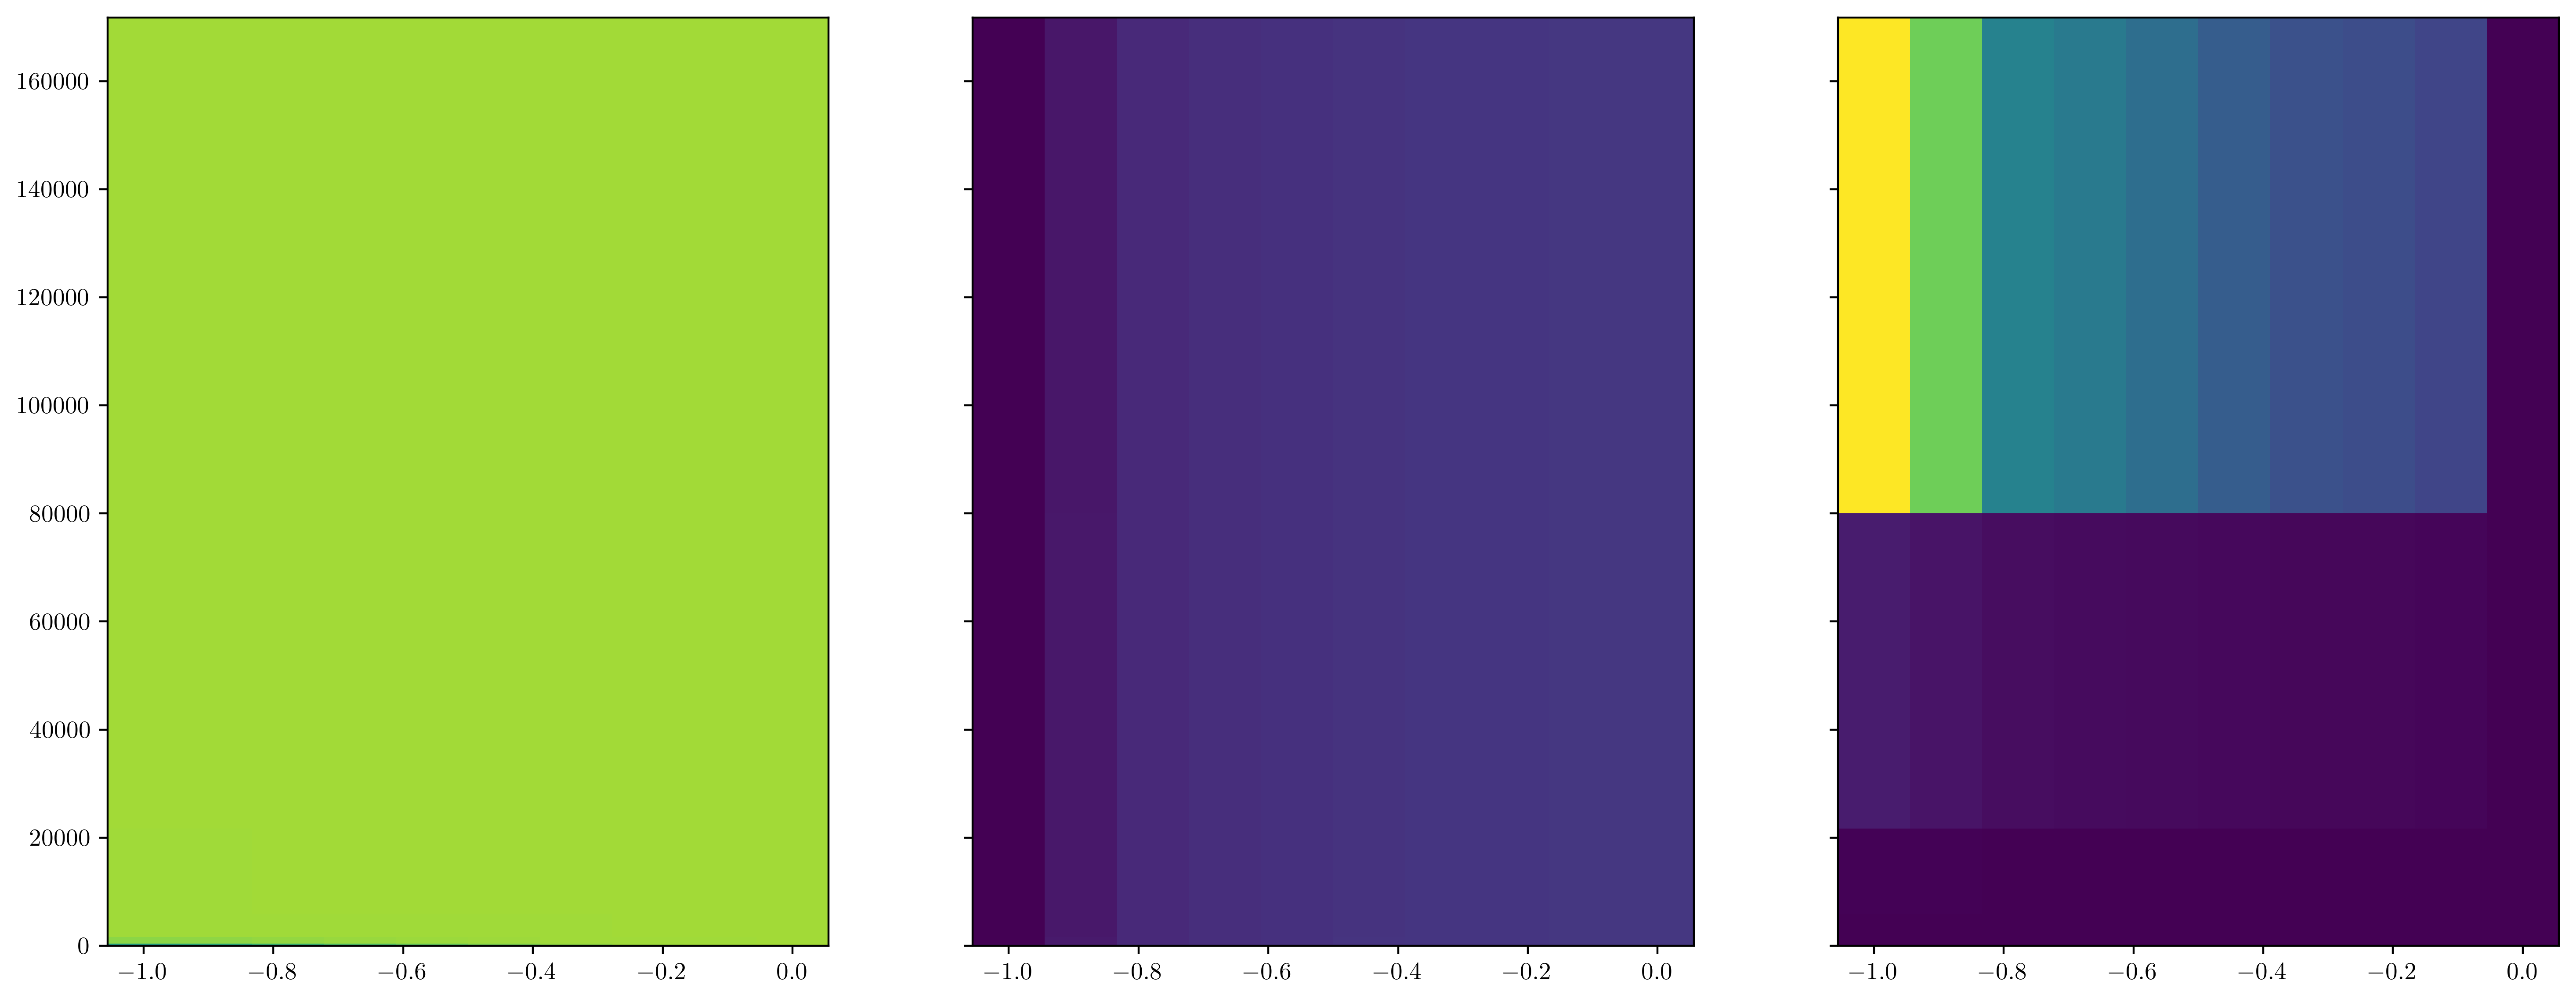

In [18]:
fig, ax = plt.subplots(1,3, figsize=(6*3,7), sharex=True,sharey=True, squeeze=True)

c1=ax[0].pcolormesh(z_range, all_range,flux_emt_IC_track[0].T,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)#) norm = CenteredNorm(0),
c2=ax[1].pcolormesh(z_range, all_range,flux_emt_IC_track[1].T,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)# 

c3=ax[2].pcolormesh(z_range, all_range,flux_emt_IC_track[2].T,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)#

In [16]:
fig, ax = plt.subplots(1,3, figsize=(6*3,7), sharex=True,sharey=True, squeeze=True)

c1=ax[0].pcolormesh(z_range, all_range,np.log10(flux_emt_IC_track[0].T+flux_emt_IC_track[1].T),cmap=track_cmap,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)#) norm = CenteredNorm(0),
c2=ax[1].pcolormesh(z_range, all_range,np.log10(flux_emt_IC_track[1].T),cmap=track_cmap,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)# 

c3=ax[2].pcolormesh(z_range, all_range,np.log10(flux_emt_IC_track[2].T),cmap=track_cmap,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)#

#ax[0].set_title(r'$\nu_{e/\tau} + \bar\nu_{e/\tau}$ flux ratio', fontsize=20)
ax[0].set_title(r'$(\phi_{\nu_e}^{NSI} + \phi_{\nu_\tau}^{NSI} + \phi_{\bar\nu_e}^{NSI} + \phi_{\bar\nu_\tau}^{NSI})/(\phi_{\nu_e}^{SI} + \phi_{\nu_\tau}^{NSI} + \phi_{\bar\nu_e}^{NSI} + \phi_{\bar\nu_\tau}^{SI})$', fontsize=15)
#ax[1].set_title(r'$\nu_\mu + \bar\nu_\mu$ flux ratio', fontsize=20)
ax[1].set_title(r'$(\phi_{\nu_\mu}^{NSI} + \phi_{\bar\nu_\mu}^{NSI})/(\phi_{\nu_\mu}^{SI} + \phi_{\bar\nu_\mu}^{SI})$', fontsize=15)
ax[0].set_xlabel(r'$\cos{(\theta^{true}_z)}$', fontsize=20)
ax[1].set_xlabel(r'$\cos{(\theta^{true}_z)}$', fontsize=20)
ax[0].tick_params(labelsize=16, direction='in', which='both', axis='both')
ax[1].tick_params(labelsize=16, direction='in', which='both', axis='both')
ax[0].set_ylabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=20)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

cax = fig.add_axes([0.8, 0.11, 0.15, 0.8])
cbar = plt.colorbar(c3, ax=cax, pad=0.35)
cbar.set_label(r'$\log{(\phi_\text{NSI}/\phi_\text{SI})}$', fontsize=20)
_=cax.axis('off')

ax[0].text(-0.30,1.9,'99\% DC cascades',rotation=0,fontsize=11,alpha = 0.4)
ax[0].axhline(1.7, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)
ax[0].axhline(145, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)

ax[1].text(-0.26,2.1,'99\% DC tracks',rotation=0,fontsize=11,alpha = 0.4)
ax[1].axhline(1.9, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)
ax[1].axhline(210, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)


ax[1].text(-0.24,320,'99\% IC tracks',rotation=0, fontsize=11, alpha = 0.4)
ax[1].axhline(284, color='black', alpha=0.3, ls='--')#get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]
ax[1].axhline(103821, color='black', alpha=0.3, ls='--') #get_Etrue(model, 3,0.995,0.995,E_index=12)[0][2]
#plt.savefig('./article/figures/flux_ratio.pdf', bbox_inches="tight")